In [1]:
import numpy as np
import numpy.random as rd
import gudhi as gd
import gudhi.representations
import matplotlib.pyplot as plt
import random
rd.seed(1)

### Persistent Entropy

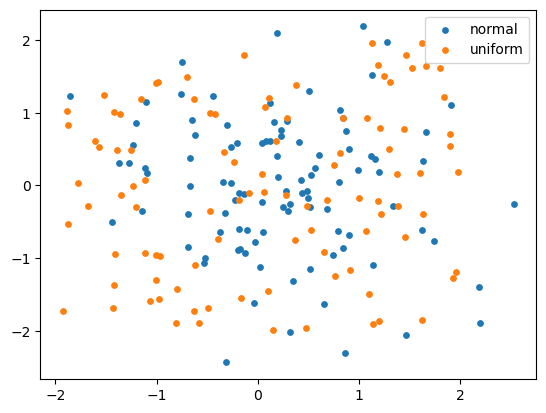

In [2]:
normal_pcs = []
uniform_pcs = []
for i in range(100):
    normal_pcs.append(rd.normal(size = [100,2]))
    uniform_pcs.append(rd.uniform(size = [100,2], low = -2, high = 2))
    
fig, ax = plt.subplots()
normal_pc = normal_pcs[0]
uniform_pc = uniform_pcs[0]
ax.scatter(normal_pc[:,0], normal_pc[:,1], s = 15, label = 'normal')
ax.scatter(uniform_pc[:,0], uniform_pc[:,1], s =15, label = 'uniform')
ax.legend()
plt.show()

In [3]:
dgms_normal = []
for pc in normal_pcs:
    rips = gd.RipsComplex(points=pc).create_simplex_tree(max_dimension=1)
    rips.compute_persistence()
    dgms_normal.append(rips.persistence_intervals_in_dimension(0))
    
dgms_uniform = []
for pc in uniform_pcs:
    rips = gd.RipsComplex(points=pc).create_simplex_tree(max_dimension=1)
    rips.compute_persistence()
    dgms_uniform.append(rips.persistence_intervals_in_dimension(0))

usetex mode requires TeX.


<AxesSubplot:title={'center':'Persistence barcode'}>

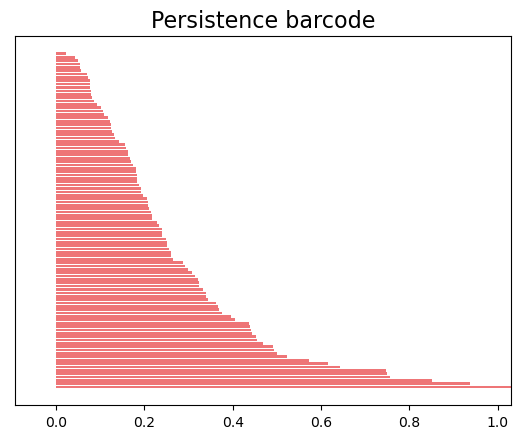

In [4]:
gd.plot_persistence_barcode(dgms_normal[0])

<AxesSubplot:title={'center':'Persistence barcode'}>

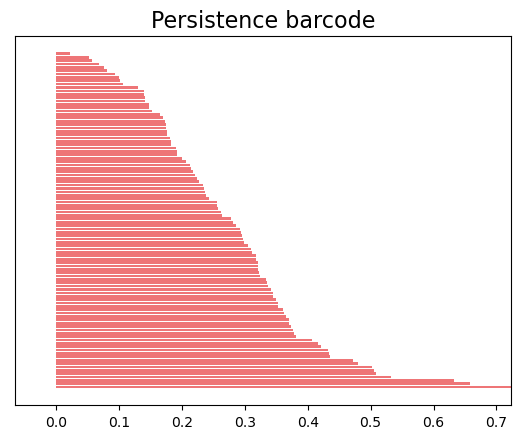

In [5]:
gd.plot_persistence_barcode(dgms_uniform[0])

In [6]:
remove_infinity = lambda barcode: np.array([bars for bars in barcode if bars[1] != np.inf])
dgms_normal = list(map(remove_infinity, dgms_normal))
dgms_uniform = list(map(remove_infinity, dgms_uniform))

In [7]:
PE = gd.representations.Entropy()
pe_normal = PE.fit_transform(dgms_normal)
pe_normal[:9]

array([[4.37779285],
       [4.46314427],
       [4.37882067],
       [4.39868606],
       [4.34488209],
       [4.43111221],
       [4.3277631 ],
       [4.42686533],
       [4.32486701]])

In [8]:
pe_uniform = PE.fit_transform(dgms_uniform)
pe_uniform[:9]

array([[4.48622121],
       [4.44512338],
       [4.47480549],
       [4.42726623],
       [4.4749265 ],
       [4.48355902],
       [4.47668513],
       [4.48049865],
       [4.45978629]])

In [9]:
pe_normal_array = np.array(pe_normal[:,0])
pe_uniform_array = np.array(pe_uniform[:,0])

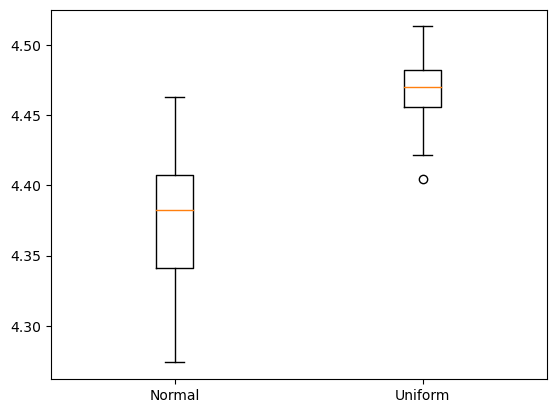

In [10]:
fig, ax = plt.subplots()

bp = ax.boxplot([pe_normal_array, pe_uniform_array], labels = ['Normal', 'Uniform'])

plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 15)

plt.show()

### Entropy Summary Function

In [11]:
dgms_normal = []
for pc in normal_pcs:
    rips = gd.RipsComplex(points=pc).create_simplex_tree(max_dimension = 2)
    rips.persistence()
    dgms_normal.append(rips.persistence_intervals_in_dimension(1))
    
dgms_uniform = []
for pc in uniform_pcs:
    rips = gudhi.RipsComplex(points=pc).create_simplex_tree(max_dimension=2)
    rips.persistence()
    dgms_uniform.append(rips.persistence_intervals_in_dimension(1))

<AxesSubplot:title={'center':'Persistence barcode'}>

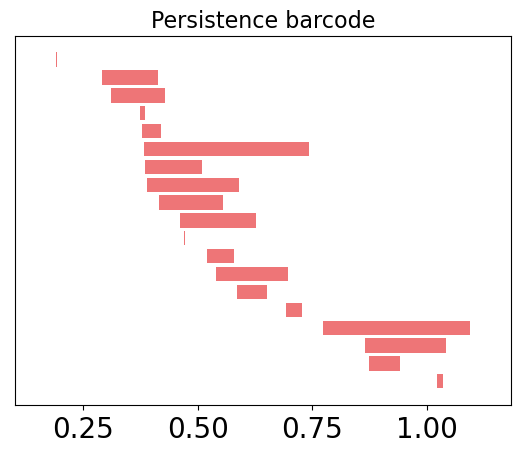

In [12]:
gd.plot_persistence_barcode(dgms_normal[0])

In [13]:
BC = gd.representations.BettiCurve(sample_range = [0, 1.5], resolution = 150)
bc_normal = BC.fit_transform(dgms_normal)
bc_uniform = BC.fit_transform(dgms_uniform)

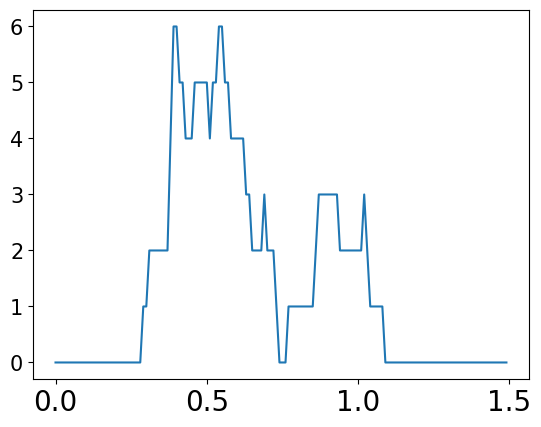

In [14]:
xseq = np.array(range(0,150))/100
plt.plot(xseq, bc_normal[0])

In [15]:
ES = gd.representations.Entropy(mode='vector', sample_range=[0,1.5], resolution =151, normalized=False)
es_normal = ES.fit_transform(dgms_normal)
es_uniform = ES.fit_transform(dgms_uniform)

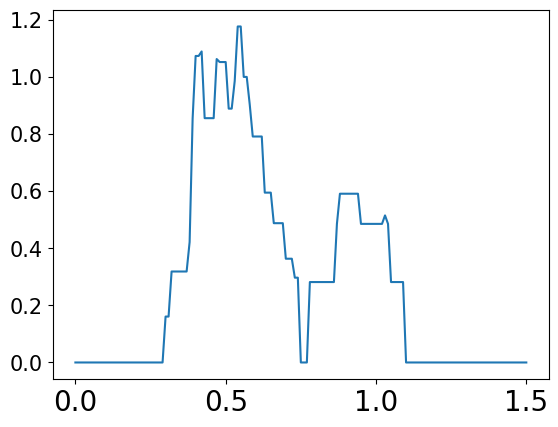

In [16]:
xseq = np.array(range(0,151))/100
plt.plot(xseq, es_normal[0])